In [ ]:
!pip install typeguard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -qq "/content/drive/MyDrive/steel-data/crop.zip"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import skimage.io
import os 
import tqdm
import glob
import tensorflow 
import warnings
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import keras
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.applications.nasnet import NASNetLarge, NASNetMobile
from keras.callbacks import Callback,ModelCheckpoint,ReduceLROnPlateau
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
from keras.applications.xception import Xception, preprocess_input
#import tensorflow_addons as tfa
#from tensorflow.keras.metrics import Metric
#from tensorflow_addons.utils.types import AcceptableDTypes, FloatTensorLike
from typeguard import typechecked
from typing import Optional
import random

In [ ]:
## mycode
import pandas as pd
import os

image_dir = "/content/cropped_images/"

class_id = []
image_id = []

images = os.listdir(image_dir)
for img in images:
        if len(img.split('mask')) != 1:
          continue
        image_id.append(img)
        id = img.split('.')[0].split('_')[1]
        if id == 'n':
            id = '0'
        class_id.append(id)

# image_dir = "/content/n_cropped_images/"

# images = os.listdir(image_dir)
# for img in images:
#         image_id.append(img)
#         id = img.split('.')[0].split('_')[1]
#         if id == 'n':
#             id = '0'
#         class_id.append(id)

In [ ]:
df = {'ImageId' : image_id, 'ClassId' : class_id}
df = pd.DataFrame(df)

In [ ]:
# print(image_id)
# print(class_id)

['bc751c15d_2_0.png', 'e07f3f1b3_3_3.png', '53e812ced_4_0.png', '2c37ea89f_1_1.png', '4c770beb5_3_0.png', '284f0aee6_3_3.png', '984c6e129_3_0.png', '55d87ed7a_3_10.png', '24fce7ae0_3_2.png', 'b7e90de47_3_1.png', '862bcc9c0_1_6.png', '4bfbe85ff_4_4.png', '05396b495_3_0.png', 'e72dc1d19_3_4.png', 'e52f2f2de_1_7.png', '627b98bc7_3_1.png', 'ffc9fdf70_3_1.png', '77a4fe06f_3_1.png', '45a59cfec_3_3.png', '028eb44d1_3_6.png', 'dc702eb04_3_1.png', '55901ac51_4_2.png', '87f6e3eeb_1_6.png', '3856224a4_3_2.png', '03db6bbc3_3_3.png', '09552b326_3_9.png', 'b3d4c7809_1_4.png', 'a664d8138_3_1.png', '693f88388_4_3.png', 'aaf12ddee_3_0.png', 'a4844715b_1_0.png', 'cbbe86379_1_3.png', '6686b6b23_3_1.png', '82f31d10e_3_2.png', 'e6c89d5fd_3_4.png', '927100ebb_3_8.png', '9ed6f9c81_3_1.png', '58c262a8b_3_2.png', 'eb2008abd_3_4.png', '42d65967f_3_3.png', '7c95f2d2d_3_0.png', 'dd9e0257b_3_1.png', 'dcc3c7a50_3_1.png', '9aa721852_4_1.png', 'd9145f0fb_3_0.png', 'd47dfa0e4_3_0.png', 'c07b4a53e_3_0.png', '1cac6e1f3_

In [ ]:
# class_mean = ["None", "Pitted", "Inclusion", "Scratches" "Patches"]

0    18589
3    14794
1     3097
4     1942
2      321
Name: ClassId, dtype: int64

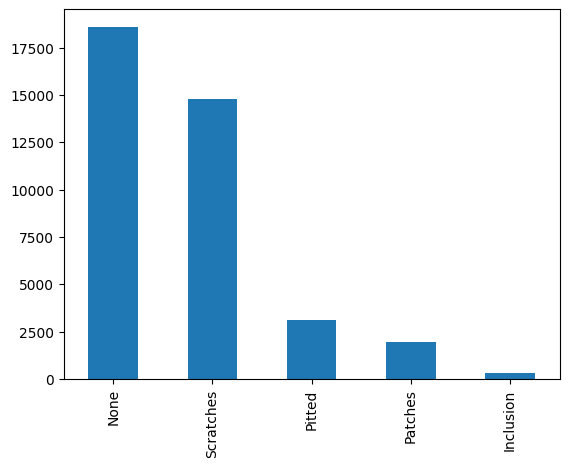

In [ ]:
# class_count = df["ClassId"].value_counts()
# class_count = class_count.rename({'0': 'None', '1': 'Pitted', '2': "Inclusion", '3': "Scratches", '4':"Patches"})
# class_count.plot(kind = 'bar')
# df["ClassId"].value_counts()

In [ ]:
l1=[]
l2=[] 
for img,ClassId in tqdm(df.values):
    image=cv2.imread(image_dir + "{}".format(img),cv2.IMREAD_COLOR)
    image=cv2.resize(image,(128,128))
    l1.append(image)
    l2.append(ClassId)

100%|██████████| 20154/20154 [00:09<00:00, 2224.67it/s]


In [ ]:
image_dir = "/content/n_cropped_images/"

class_id = []
image_id = []
images = os.listdir(image_dir)
for img in images:
        image_id.append(img)
        id = img.split('.')[0].split('_')[1]
        if id == 'n':
            id = '0'
        class_id.append(id)

df = {'ImageId' : image_id, 'ClassId' : class_id}
df = pd.DataFrame(df)

for img,ClassId in tqdm(df.values):
    image=cv2.imread(image_dir + "{}".format(img),cv2.IMREAD_COLOR)
    image=cv2.resize(image,(128,128))
    l1.append(image)
    l2.append(ClassId)

100%|██████████| 18589/18589 [00:30<00:00, 602.72it/s]


In [ ]:
len(np.array(l1))

38743

In [ ]:
encoder = LabelEncoder()

In [ ]:
X= np.array(l1)
y = encoder.fit_transform(l2)
y = to_categorical(y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("x_val shape:",X_val.shape)

print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)
print("y_val shape:",y_val.shape)

x_train shape: (24795, 128, 128, 3)
x_test shape: (7749, 128, 128, 3)
x_val shape: (6199, 128, 128, 3)
y_train shape: (24795, 5)
y_test shape: (7749, 5)
y_val shape: (6199, 5)


In [ ]:
base_model = tf.keras.applications.Xception(input_shape=(128,128,3),include_top=False,weights="imagenet")

In [ ]:
model=Sequential()

model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256,activation="relu"))
model.add(Dense(5,activation="softmax"))
model.compile(optimizer='Adam', loss='categorical_crossentropy')

In [ ]:
# Model Summary

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 dropout_9 (Dropout)         (None, 4, 4, 2048)        0         
                                                                 
 flatten_7 (Flatten)         (None, 32768)             0         
                                                                 
 dense_16 (Dense)            (None, 256)               8388864   
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dropout_11 (Dropout)        (None, 128)              

In [ ]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.50, min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
%time
history = model.fit(X_train,y_train,epochs=15,validation_data=(X_val,y_val),batch_size=128,verbose=1,callbacks=[lrd,mcp,es])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
Epoch 1/15
194/194 [==============================] - 167s 721ms/step - loss: 0.1033 - accuracy: 0.9917 - precision: 0.9883 - recall: 0.9701 - auc: 0.9983 - f1_score: 0.9764 - val_loss: 0.7892 - val_accuracy: 0.9801 - val_precision: 0.9513 - val_recall: 0.9490 - val_auc: 0.9831 - val_f1_score: 0.9499 - lr: 0.0010
Epoch 2/15
194/194 [==============================] - 138s 710ms/step - loss: 0.0401 - accuracy: 0.9958 - precision: 0.9915 - recall: 0.9876 - auc: 0.9991 - f1_score: 0.9895 - val_loss: 0.8780 - val_accuracy: 0.9667 - val_precision: 0.9217 - val_recall: 0.9110 - val_auc: 0.9763 - val_f1_score: 0.9164 - lr: 0.0010
Epoch 3/15
194/194 [==============================] - 138s 710ms/step - loss: 0.0263 - accuracy: 0.9968 - precision: 0.9930 - recall: 0.9909 - auc: 0.9995 - f1_score: 0.9920 - val_loss: 0.2826 - val_accuracy: 0.9821 - val_precision: 0.9587 - val_recall: 0.9516 - val_auc: 0.9889 - val_f1_score: 0.9551 - lr:

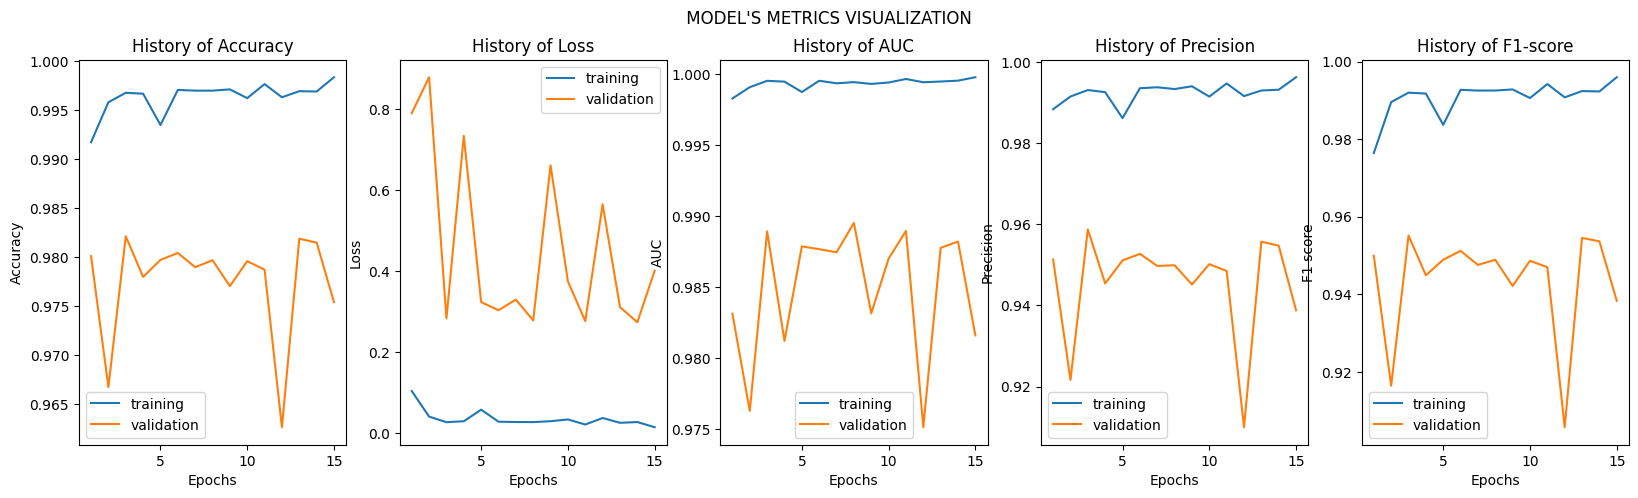

In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()
    

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )

In [ ]:
Evaluate = model.evaluate(X_test, y_test)

243/243 [==============================] - 10s 42ms/step - loss: 0.3880 - accuracy: 0.9741 - precision: 0.9361 - recall: 0.9342 - auc: 0.9810 - f1_score: 0.9347


In [ ]:
prediction = model.predict(X_test)

243/243 [==============================] - 11s 41ms/step


In [ ]:
model.save('data_4000.h5')